DAG nodes:
[Rz([1], theta1), CNOT([0, 1]), Rz([1], theta2), Rz([0], theta3), CNOT([1, 0]), Rz([1], theta4)]

DAG edges (dependencies):
[(Rz([1], theta1), CNOT([0, 1])), (CNOT([0, 1]), Rz([1], theta2)), (Rz([1], theta2), CNOT([1, 0])), (Rz([0], theta3), CNOT([1, 0])), (CNOT([1, 0]), Rz([1], theta4))]


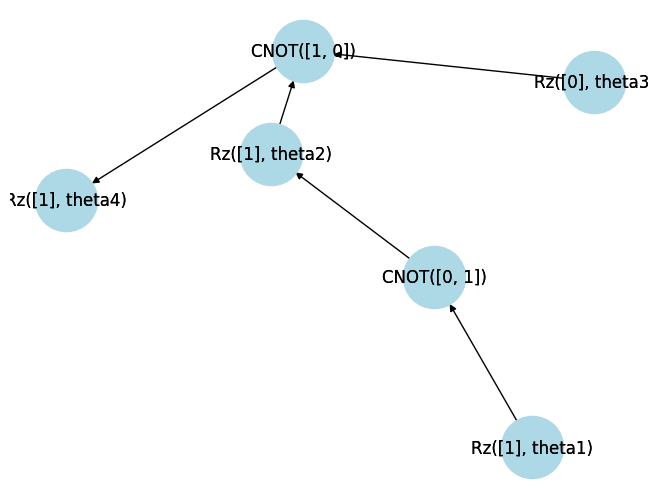

In [12]:
import networkx as nx

class QuantumGate:
    def __init__(self, gate_type, qubits, angle=None):
        self.gate_type = gate_type  # Type de porte
        self.qubits = qubits  # Liste des qubits affectés
        self.angle = angle  # Si c'est une porte Rz, on inclut l'angle

    def __repr__(self):
        if self.angle:
            return f"{self.gate_type}({self.qubits}, {self.angle})"
        else:
            return f"{self.gate_type}({self.qubits})"

dag = nx.DiGraph()

gate_1 = QuantumGate('Rz', [1], 'theta1')
gate_2 = QuantumGate('CNOT', [0, 1])
gate_3 = QuantumGate('Rz', [1], 'theta2')
gate_4 = QuantumGate('Rz', [0], 'theta3')
gate_5 = QuantumGate('CNOT', [1, 0])
gate_6 = QuantumGate('Rz', [1], 'theta4')

dag.add_node(gate_1)
dag.add_node(gate_2)
dag.add_node(gate_3)
dag.add_node(gate_4)
dag.add_node(gate_5)
dag.add_node(gate_6)

dag.add_edge(gate_1, gate_2)
dag.add_edge(gate_2, gate_3)
dag.add_edge(gate_3, gate_5)
dag.add_edge(gate_4, gate_5)
dag.add_edge(gate_5, gate_6)

print("DAG nodes:")
print(dag.nodes())
print("\nDAG edges (dependencies):")
print(dag.edges())

import matplotlib.pyplot as plt

pos = nx.spring_layout(dag)
nx.draw(dag, pos, with_labels=True, node_size=2000, node_color="lightblue")
labels = {node: str(node) for node in dag.nodes()}
nx.draw_networkx_labels(dag, pos, labels)
plt.show()


DAG nodes:
[U3([0], (0.5, 1.0, 1.5)), T([1]), CCNOT([0, 1, 2]), CNOT([2, 3]), Rz([2], theta2), Rz([3], theta3), T([2]), CCNOT([1, 2, 3])]

DAG edges (dependencies):
[(U3([0], (0.5, 1.0, 1.5)), CCNOT([0, 1, 2])), (T([1]), CCNOT([0, 1, 2])), (CCNOT([0, 1, 2]), CNOT([2, 3])), (CNOT([2, 3]), Rz([2], theta2)), (CNOT([2, 3]), Rz([3], theta3)), (Rz([2], theta2), T([2])), (Rz([3], theta3), CCNOT([1, 2, 3])), (T([2]), CCNOT([1, 2, 3]))]


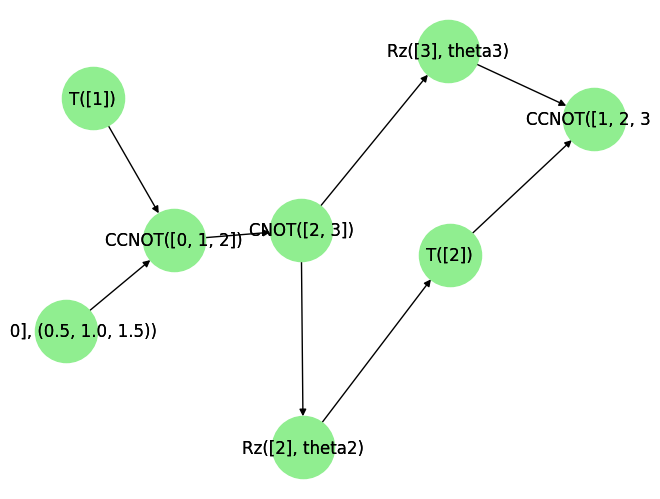

In [13]:
dag = nx.DiGraph()

gate_1 = QuantumGate('U3', [0], (0.5, 1.0, 1.5))  # Porte U3 sur le qubit 0
gate_2 = QuantumGate('T', [1])  # Porte T sur le qubit 1
gate_3 = QuantumGate('CCNOT', [0, 1, 2])  # Porte Toffoli (CCNOT) sur les qubits 0, 1, 2
gate_4 = QuantumGate('CNOT', [2, 3])  # Porte CNOT entre qubit 2 (contrôle) et qubit 3 (cible)
gate_5 = QuantumGate('Rz', [2], 'theta2')  # Rotation Rz sur qubit 2
gate_6 = QuantumGate('Rz', [3], 'theta3')  # Rotation Rz sur qubit 3
gate_7 = QuantumGate('T', [2])  # Deuxième porte T sur qubit 2
gate_8 = QuantumGate('CCNOT', [1, 2, 3])  # Deuxième CCNOT entre qubits 1, 2, 3

dag.add_node(gate_1)
dag.add_node(gate_2)
dag.add_node(gate_3)
dag.add_node(gate_4)
dag.add_node(gate_5)
dag.add_node(gate_6)
dag.add_node(gate_7)
dag.add_node(gate_8)

dag.add_edge(gate_1, gate_3)  
dag.add_edge(gate_2, gate_3)
dag.add_edge(gate_3, gate_4)
dag.add_edge(gate_4, gate_5)
dag.add_edge(gate_5, gate_7)
dag.add_edge(gate_4, gate_6)
dag.add_edge(gate_7, gate_8)
dag.add_edge(gate_6, gate_8)


print("DAG nodes:")
print(dag.nodes())
print("\nDAG edges (dependencies):")
print(dag.edges())

import matplotlib.pyplot as plt

pos = nx.spring_layout(dag)
nx.draw(dag, pos, with_labels=True, node_size=2000, node_color="lightgreen")
labels = {node: str(node) for node in dag.nodes()}
nx.draw_networkx_labels(dag, pos, labels)
plt.show()


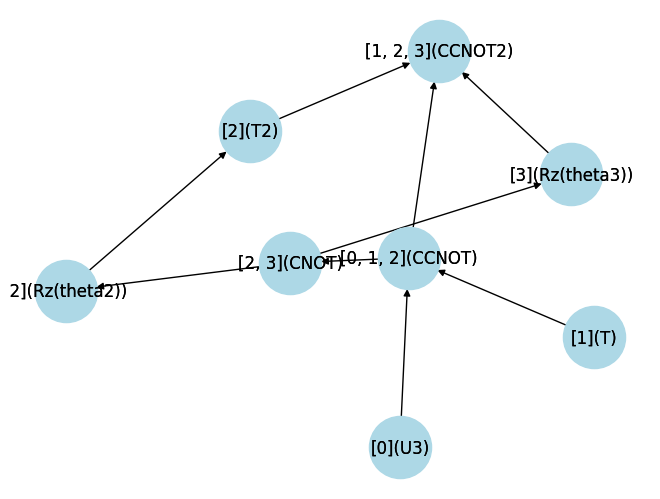

In [1]:
import networkx as nx
from typing import List, Optional

class Gate:
    def __init__(self, targets: List[int], label: Optional[str] = None):
        self.targets = targets
        self.label = label 

    def __repr__(self):
        return f"{self.targets}({self.label})"

def create_graph_from_netlist(netlist: List[Gate]):
    dag = nx.DiGraph() 
    
    # Dictionnaire pour garder une trace de la dernière porte sur chaque qubit
    last_gate_on_qubit = {}


    for gate in netlist:
        # Ajouter la porte comme un nœud dans le DAG
        dag.add_node(gate)

        # Pour chaque qubit sur lequel cette porte agit
        for qubit in gate.targets:
            # Si une autre porte a agi précédemment sur ce qubit, il y a une dépendance
            if qubit in last_gate_on_qubit:
                # Ajouter un arc entre la dernière porte sur ce qubit et la porte actuelle
                dag.add_edge(last_gate_on_qubit[qubit], gate)
            
            # Mettre à jour la dernière porte agissant sur ce qubit
            last_gate_on_qubit[qubit] = gate

    return dag

netlist = [
    Gate([0], label="U3"),        
    Gate([1], label="T"),        
    Gate([0, 1, 2], label="CCNOT"), 
    Gate([2, 3], label="CNOT"),
    Gate([2], label="Rz(theta2)"),
    Gate([3], label="Rz(theta3)"),
    Gate([2], label="T2"),        
    Gate([1, 2, 3], label="CCNOT2") 
]

dag = create_graph_from_netlist(netlist)


import matplotlib.pyplot as plt

pos = nx.spring_layout(dag)
nx.draw(dag, pos, with_labels=True, node_size=2000, node_color="lightblue")
labels = {node: str(node) for node in dag.nodes()}
nx.draw_networkx_labels(dag, pos, labels)
plt.show()
